In [1]:
import importlib
from importlib import reload
import ursse.sync_motion_simulation as sms

In [2]:
# reload(sms)

In [3]:
%%time
res = sms.calc_sim_df_several_files(7e-5)

working on 1 out of 5
working on 2 out of 5
working on 3 out of 5
working on 4 out of 5
working on 5 out of 5
CPU times: user 5min 17s, sys: 627 ms, total: 5min 18s
Wall time: 5min 16s


In [5]:
res[0]['meas_df'].head()

,revolution,delay
0,51,-0.639716
1,171,0.720284
2,239,-1.227716
3,598,-0.162716
4,999,0.686284


In [7]:
import ursse.phase_space_trajectory as pst

In [14]:
for i, el in enumerate(res):
    print(f"working on {i+1} out of {len(res)}")
    el["meas_T0"] = pst.get_initial_sync_period_estimate(el["meas_df"])
    el["meas_phase_df"], el["meas_fits_df"] = pst.get_phase_df_from_revoluton_delay_df(
        el["meas_df"], el["meas_T0"])
    el["meas_sz_df"] = pst.get_sz_df(el["meas_df"], spad_tts_ns=0)
    el["meas_polar_df"] = pst.get_polar_df(el["meas_phase_df"], el["meas_sz_df"])
    el["sim_T0"] = pst.get_initial_sync_period_estimate(el["sim_df"])
    el["sim_phase_df"], el["sim_fits_df"] = pst.get_phase_df_from_revoluton_delay_df(
        el["sim_df"], el["sim_T0"])
    el["sim_sz_df"] = pst.get_sz_df(el["sim_df"], spad_tts_ns=0)
    el["sim_polar_df"] = pst.get_polar_df(el["sim_phase_df"], el["sim_sz_df"])

working on 1 out of 5
working on 2 out of 5
working on 3 out of 5
working on 4 out of 5
working on 5 out of 5


In [15]:
import matplotlib.pyplot as plt

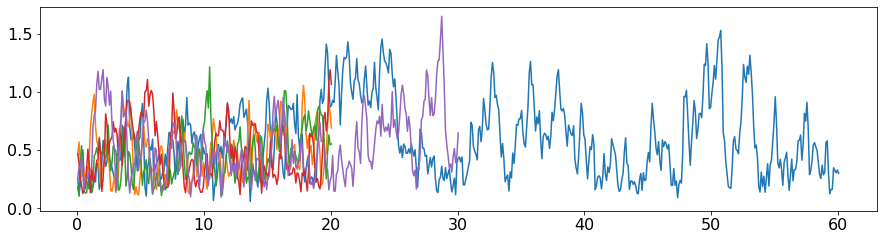

In [17]:
for el in res:
    sim_sz_df = el['sim_sz_df']
    plt.plot(sim_sz_df['time_sec'], sim_sz_df['sz_ns'])
plt.show()

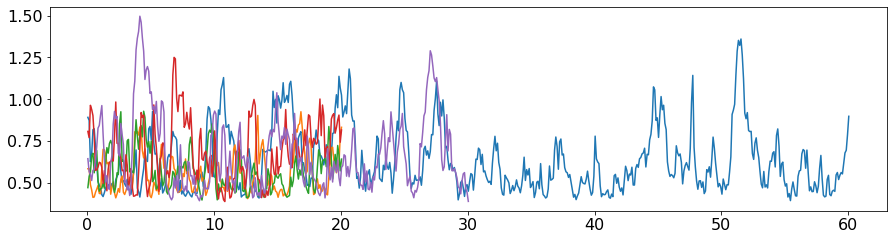

In [18]:
for el in res:
    meas_sz_df = el['meas_sz_df']
    plt.plot(meas_sz_df['time_sec'], meas_sz_df['sz_ns'])
plt.show()

In [23]:
import numpy as np

In [34]:
nbins = 50
el = res[0]
l = min(el['meas_fits_df']['Amplitude_ns'].min(), el['sim_fits_df']['Amplitude_ns'].min())
r = max(el['meas_fits_df']['Amplitude_ns'].max(), el['sim_fits_df']['Amplitude_ns'].max())
for el in res[1:]:
    lc = min(el['meas_fits_df']['Amplitude_ns'].min(), el['sim_fits_df']['Amplitude_ns'].min())
    rc = max(el['meas_fits_df']['Amplitude_ns'].max(), el['sim_fits_df']['Amplitude_ns'].max())
    if lc < l:
        l = lc
    if rc > r:
        r = rc
bins = np.linspace(l, r, nbins)
bin_centers = (bins[1:]+bins[:-1])/2
for el in res:
    el['meas_amp_hist'] = np.histogram(el['meas_fits_df']['Amplitude_ns'], bins=bins)[0]
    el['sim_amp_hist'] = np.histogram(el['sim_fits_df']['Amplitude_ns'], bins=bins)[0]

In [35]:
meas_amp_hist = np.zeros(bin_centers.shape)
sim_amp_hist = np.zeros(bin_centers.shape)
for el in res:
    meas_amp_hist += el['meas_amp_hist']
    sim_amp_hist += el['sim_amp_hist']

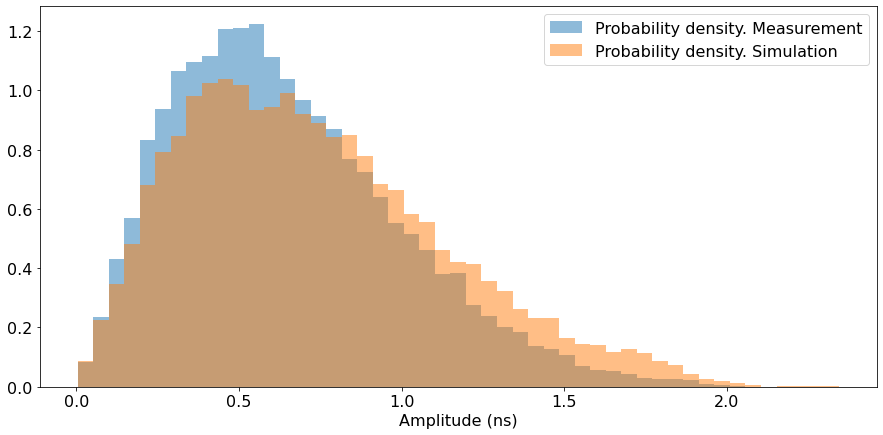

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
ax.hist(bin_centers, weights=meas_amp_hist, bins=bins, density=True,
            alpha=0.5, label="Probability density. Measurement")
ax.hist(bin_centers, weights=sim_amp_hist, bins=bins, density=True,
            alpha=0.5, label="Probability density. Simulation")
ax.set_xlabel(r"Amplitude (ns)")
ax.legend()
plt.show()